In [477]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [482]:
google_play_df = pd.read_csv("data/google-play-store-apps/googleplaystore.csv")
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [325]:
google_play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [326]:
google_play_reviews_df = pd.read_csv("data/google-play-store-apps/googleplaystore_user_reviews.csv")
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [327]:
google_play_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [328]:
#This row was missing the category and data was shifted incorrectly. 
#Because it was only one row, I decided to remove the entire row from the data. 
print(google_play_df.iloc[10472])


#Drops index row 10472
google_play_df = google_play_df.drop(10472)

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object


In [329]:
#Check to see if the row was dropped
google_play_df.iloc[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


# Question 1: 
Which category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

In [330]:
#Reviews column were all string objects. Converted each value into int type.
google_play_df['Reviews'] = google_play_df['Reviews'].map(lambda x: int(x))
print(google_play_df['Reviews'].dtype)

int64


In [337]:
#Checks how many NaN values are in the Rating column
google_play_df['Rating'].isna().value_counts()

False    9366
True     1474
Name: Rating, dtype: int64

In [452]:
#The missing ratings are based on not enough reviews. I filtered the apps who have more than 50 reviews.
reviews_greater_50 = google_play_df.loc[(google_play_df['Rating'].notna()) & (google_play_df['Reviews'] > 50),['Category','Rating','Reviews']]
print(reviews_greater_50['Rating'].isna().value_counts())
reviews_greater_50


False    7867
Name: Rating, dtype: int64


,Category,Rating,Reviews
0,ART_AND_DESIGN,4.1,159
1,ART_AND_DESIGN,3.9,967
2,ART_AND_DESIGN,4.7,87510
3,ART_AND_DESIGN,4.5,215644
4,ART_AND_DESIGN,4.3,967
...,...,...,...
10829,BOOKS_AND_REFERENCE,4.6,603
10830,NEWS_AND_MAGAZINES,3.8,881
10832,WEATHER,3.8,1195
10839,BOOKS_AND_REFERENCE,4.5,114


In [481]:
#Grouped the Mean of the Rating by the Category 
best_rating_category = reviews_greater_50.groupby(['Category']).mean().sort_values(by='Rating',ascending=False).round(2)
best_rating_category.head()

,Rating,Reviews
Category,,
EDUCATION,4.38,258790.71
BOOKS_AND_REFERENCE,4.37,153552.08
BEAUTY,4.34,11968.39
ART_AND_DESIGN,4.34,31167.24
PARENTING,4.33,22699.50


In [469]:
best_rating_category = best_rating_category.reset_index('Category')
best_rating_category.head()

,Category,Rating,Reviews
0,EDUCATION,4.38,258790.71
1,BOOKS_AND_REFERENCE,4.37,153552.08
2,BEAUTY,4.34,11968.39
3,ART_AND_DESIGN,4.34,31167.24
4,PARENTING,4.33,22699.50


AttributeError: module 'matplotlib' has no attribute 'xlabel'

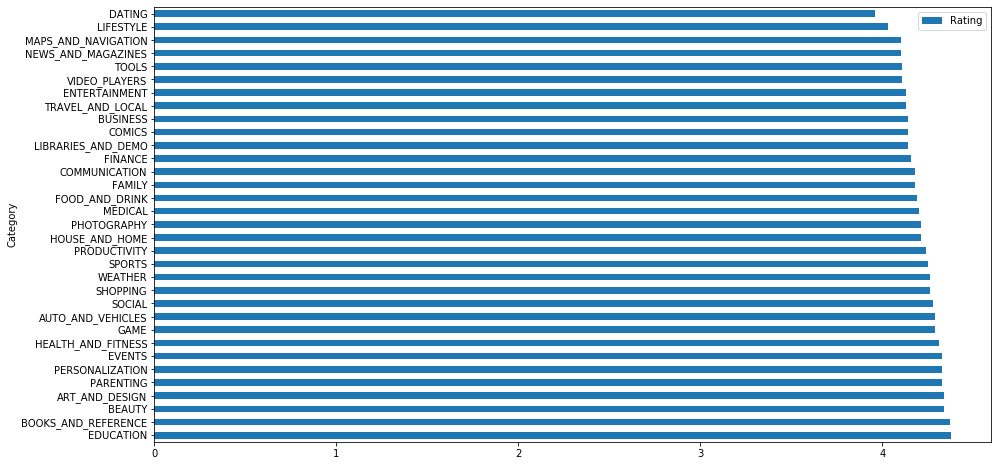

In [478]:
best_rating_category.plot(x='Category', y='Rating',kind='barh',figsize=(15,8))
# plt.xlabel('Rating')

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

# For this next section, choose a Category of playstore apps

## Category Chosen: [insert here]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

# Question 4:
What is something interesting you found about your category? 

# Question 5:
What is something interesting you found about your category in relationship to the rest of the data? 

# Question 6:
Anything else we should know about this dataset?